In [17]:
import numpy as np

np.random.seed(3)

#############################################################
####################### INSTRUCTIONS ########################
#############################################################
"""
Goal: Implement a simple Neural Network to for binary classification over
2-dimensional input data. The network must have 1 hidden layer containing 4 units.

The network should utilize mini-batch training, a sigmoid activation function, and
MSE loss function. The batch size is set in the 
"Parameters" section.

Please fill in the 4 functions in the section labeled "Fill In These Functions."
The function signatures must not change, and must return appropriate outputs based 
on the in-line comments within them. You may add additional functions as you see fit.
You may leverage the functions in the "Utilities" section if you find it necessary.
You may change N, LEARNING_RATE, BATCH_SIZE, NUM_EPOCHS if it helps you train your 
network. Do not modify the code in the section labeled "Do Not Modify Below."
Code in this section will call your functions, so make sure your implementation
is compatible.

Your code must run (you can test it by clicking "Run" button in the top-left).
The "train" method will train your network over NUM_EPOCHS epochs, and print a 
mean-squared error over the hold-out set after each epoch.

Please feel free to add extra print statements if it helps you debug your code.

This exercise is open-book. You may leverage resources you find on the Internet, 
such as syntax references, mathematical formulae, etc., but you should not adapt 
or otherwise use existing implementation code.

The following PDF reference may be useful to you:
https://drive.google.com/file/d/1zbRSQJaPrQHYOGzPYLm6mbFLUHhVxlm2/view?usp=sharing
"""

#############################################################
######################### PARAMETERS ########################
#############################################################
N = 1000
LEARNING_RATE = 1
BATCH_SIZE = 5
NUM_EPOCHS = 10
INPUT_WIDTH = 2
HIDDEN_LAYER_WIDTH = 4
OUTPUT_LAYER_WIDTH = 1
HIDDEN_LAYER_WEIGHTS_SHAPE = (HIDDEN_LAYER_WIDTH, INPUT_WIDTH)
HIDDEN_LAYER_BIASES_SHAPE = (HIDDEN_LAYER_WIDTH, 1)
OUTPUT_LAYER_WEIGHTS_SHAPE = (OUTPUT_LAYER_WIDTH, HIDDEN_LAYER_WIDTH)
OUTPUT_LAYER_BIASES_SHAPE = (OUTPUT_LAYER_WIDTH, 1)
INITIAL_HIDDEN_LAYER_WEIGHTS = np.random.random(HIDDEN_LAYER_WEIGHTS_SHAPE)
INITIAL_HIDDEN_LAYER_BIASES = np.random.random(HIDDEN_LAYER_BIASES_SHAPE)
INITIAL_OUTPUT_LAYER_WEIGHTS = np.random.random(OUTPUT_LAYER_WEIGHTS_SHAPE)
INITIAL_OUTPUT_LAYER_BIASES = np.random.random(OUTPUT_LAYER_BIASES_SHAPE)

#############################################################
######################### UTILITIES #########################
#############################################################
def sigmoid(z):
    # activation function
    return 1.0 / (1.0 + np.exp(-z))


def sigmoid_prime(z):
    # derivative of activation function
    return sigmoid(z) * (1 - sigmoid(z))


def assert_has_shape(val, expected_shape):
    assert val.shape == expected_shape, f"Expected {val} to have shape {expected_shape}, but was {val.shape}."


#############################################################
################## FILL IN THESE FUNCTIONS ##################
#############################################################
def compute_hidden_layer_weighted_input(x, hidden_layer_weights, hidden_layer_biases):
    # return the weighted inputs (before applying sigmoid) for layer 1 as a 4x1 matrix
    assert_has_shape(x, (2, 1))
    assert_has_shape(hidden_layer_weights, HIDDEN_LAYER_WEIGHTS_SHAPE)
    assert_has_shape(hidden_layer_biases, HIDDEN_LAYER_BIASES_SHAPE)

    # fill in
    # return np.random.random((HIDDEN_LAYER_WIDTH, 1))
    # Compute the weighted input using the dot product of weights and input and add biases.
    weighted_input = np.dot(hidden_layer_weights, x) + hidden_layer_biases
    return weighted_input


def compute_output_layer_weighted_input(
    hidden_layer_activation, output_layer_weights, output_layer_biases
):
    # return the weighted inputs (before applying sigmoid) for output layer as a 1x1 matrix
    assert_has_shape(hidden_layer_activation, (HIDDEN_LAYER_WIDTH, 1))
    assert_has_shape(output_layer_weights, OUTPUT_LAYER_WEIGHTS_SHAPE)
    assert_has_shape(output_layer_biases, OUTPUT_LAYER_BIASES_SHAPE)

    # fill in
    # return np.random.random((OUTPUT_LAYER_WIDTH, 1))
    # Compute the weighted input using the dot product of weights and input and add biases.
    weighted_input = np.dot(output_layer_weights, hidden_layer_activation) + output_layer_biases
    return weighted_input


def compute_gradients(
    x,
    y,
    hidden_layer_weights,
    hidden_layer_biases,
    hidden_layer_weighted_input,
    output_layer_weights,
    output_layer_biases,
    output_layer_weighted_input,
):
    # x, y is a single training example
    # for a single training example, return the gradient of loss with respect to each layer's weights and biases
    # return value should be a tuple of lists, where the first element is the list of weight gradients,
    # and the second is the list of bias gradients. the shape of each "gradient" should correspond to the shape of the
    # weight/bias matrix it will be used to update.
    assert_has_shape(x, (2, 1))
    assert_has_shape(hidden_layer_weights, HIDDEN_LAYER_WEIGHTS_SHAPE)
    assert_has_shape(hidden_layer_biases, HIDDEN_LAYER_BIASES_SHAPE)
    assert_has_shape(output_layer_weights, OUTPUT_LAYER_WEIGHTS_SHAPE)
    assert_has_shape(output_layer_biases, OUTPUT_LAYER_BIASES_SHAPE)

    # fill in
    # weight_gradients = [
    #     np.zeros((HIDDEN_LAYER_WIDTH, INPUT_WIDTH)),
    #     np.zeros(OUTPUT_LAYER_WIDTH, HIDDEN_LAYER_WIDTH),
    # ]
    # bias_gradients = [
    #     np.zeros((HIDDEN_LAYER_WIDTH, 1)),
    #     np.zeros((OUTPUT_LAYER_WIDTH, 1)),
    # ]
    # return weight_gradients, bias_gradients
    
    # Calculate gradients for weights and biases of both layers.

    # Calculate the error in the output layer.
    output_layer_error = sigmoid(output_layer_weighted_input) - y
    
    # Calculate the gradient for the output layer weights and biases.
    output_layer_weight_gradients = output_layer_error * sigmoid_prime(output_layer_weighted_input) * sigmoid(hidden_layer_weighted_input)
    output_layer_bias_gradients = output_layer_error * sigmoid_prime(output_layer_weighted_input) * 1
    
    # # Calculate the error in the hidden layer.
    hidden_layer_error = np.dot(output_layer_weights.T, output_layer_error)
    
    # Calculate the gradient for the hidden layer weights and biases.
    # hidden_layer_weight_gradients = output_layer_error * sigmoid_prime(output_layer_weighted_input) * output_layer_weights * sigmoid_prime(hidden_layer_weighted_input) * x.T
    # hidden_layer_bias_gradients = output_layer_error * sigmoid_prime(output_layer_weighted_input) * output_layer_weights * sigmoid_prime(hidden_layer_weighted_input) * 1
    hidden_layer_weight_gradients = hidden_layer_error * sigmoid_prime(hidden_layer_weighted_input) * x.T
    hidden_layer_bias_gradients = hidden_layer_error * sigmoid_prime(hidden_layer_weighted_input)
    
    # Return the gradients.
    weight_gradients = [hidden_layer_weight_gradients, output_layer_weight_gradients]
    bias_gradients = [hidden_layer_bias_gradients, output_layer_bias_gradients]
    
    return weight_gradients, bias_gradients


def get_new_weights_and_biases(
    training_batch,
    hidden_layer_weights,
    hidden_layer_biases,
    output_layer_weights,
    output_layer_biases,
):
    # training_batch is a list of (x, y) training examples
    # return the new weights and biases after processing this batch of data, and according to LEARNING_RATE

    # fill in
    # new_weights = [hidden_layer_weights, output_layer_weights]
    # new_biases = [hidden_layer_biases, output_layer_biases]
    # return new_weights, new_biases

    # Update the weights and biases based on the training batch and learning rate.

    # Initialize the accumulators for gradients.
    total_weight_gradients = [np.zeros_like(w) for w in [hidden_layer_weights, output_layer_weights]]
    total_bias_gradients = [np.zeros_like(b) for b in [hidden_layer_biases, output_layer_biases]]
    
    for x, y in training_batch:
        # Compute the weighted inputs for both layers.
        hidden_layer_weighted_input = compute_hidden_layer_weighted_input(x, hidden_layer_weights, hidden_layer_biases)
        hidden_layer_activation = sigmoid(hidden_layer_weighted_input)
        output_layer_weighted_input = compute_output_layer_weighted_input(hidden_layer_activation, output_layer_weights, output_layer_biases)
        
        # Compute gradients for this training example.
        weight_gradients, bias_gradients = compute_gradients(
            x, y, hidden_layer_weights, hidden_layer_biases, hidden_layer_weighted_input,
            output_layer_weights, output_layer_biases, output_layer_weighted_input
        )
        
        # Accumulate gradients.
        total_weight_gradients = [twg + wg for twg, wg in zip(total_weight_gradients, weight_gradients)]
        total_bias_gradients = [tbg + bg for tbg, bg in zip(total_bias_gradients, bias_gradients)]
    
    # Update weights and biases using the accumulated gradients and learning rate.
    learning_rate = LEARNING_RATE
    new_weights = [w - learning_rate * g for w, g in zip([hidden_layer_weights, output_layer_weights], total_weight_gradients)]
    new_biases = [b - learning_rate * g for b, g in zip([hidden_layer_biases, output_layer_biases], total_bias_gradients)]
    
    return new_weights, new_biases

    
#############################################################
#################### DO NOT MODIFY BELOW ####################
#############################################################
def predict(
    x,
    hidden_layer_weights,
    hidden_layer_biases,
    output_layer_weights,
    output_layer_biases,
):
    hidden_layer_activation = sigmoid(compute_hidden_layer_weighted_input(x, hidden_layer_weights, hidden_layer_biases))
    output_layer_activation = sigmoid(compute_output_layer_weighted_input(hidden_layer_activation, output_layer_weights, output_layer_biases))
    return output_layer_activation[0][0]

def train(
    X,
    Y,
    hidden_layer_weights,
    hidden_layer_biases,
    output_layer_weights,
    output_layer_biases,
):
    # X is an array of (2 x 1) input instances
    # Y is an array of scalar targets
    for batch_start in range(0, len(X), BATCH_SIZE):
        batch_end = batch_start + BATCH_SIZE
        x_batch = X[batch_start:batch_end]
        y_batch = Y[batch_start:batch_end]
        batch = list(zip(x_batch, y_batch))

        new_weights, new_biases = get_new_weights_and_biases(
            batch,
            hidden_layer_weights,
            hidden_layer_biases,
            output_layer_weights,
            output_layer_biases,
        )
        hidden_layer_weights, output_layer_weights = new_weights
        hidden_layer_biases, output_layer_biases = new_biases

    # return the final weights and biases
    return (
        [hidden_layer_weights, output_layer_weights],
        [hidden_layer_biases, output_layer_biases],
    )


def compute_mse(
    X_test,
    Y_test,
    hidden_layer_weights,
    hidden_layer_biases,
    output_layer_weights,
    output_layer_biases,
):
    predictions = []
    for x in X_test:
        predictions.append(
            predict(
                x,
                hidden_layer_weights,
                hidden_layer_biases,
                output_layer_weights,
                output_layer_biases,
            )
        )
    y_hat = np.array(predictions)
    return np.mean((y_hat - Y_test) ** 2)


# prepare input data
X = np.random.choice([0, 1], (N, 2))
Y = np.logical_xor(X[:, 0], X[:, 1]) * 1
X = X + 0.1 * np.random.random((N, 2))
X = [np.array([x]).T for x in X]

# split into train and test
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
Y_train, Y_test = Y[:split], Y[split:]

# initialize weigths, biases
hidden_layer_weights, hidden_layer_biases = (
    INITIAL_HIDDEN_LAYER_WEIGHTS,
    INITIAL_HIDDEN_LAYER_BIASES,
)
output_layer_weights, output_layer_biases = (
    INITIAL_OUTPUT_LAYER_WEIGHTS,
    INITIAL_OUTPUT_LAYER_BIASES,
)

# train over epochs, calculate MSE at each epoch
for epoch in range(NUM_EPOCHS):
    weights, biases = train(
        X_train,
        Y_train,
        hidden_layer_weights,
        hidden_layer_biases,
        output_layer_weights,
        output_layer_biases,
    )
    hidden_layer_weights, output_layer_weights = weights
    hidden_layer_biases, output_layer_biases = biases
    epoch_mse = compute_mse(
        X_test,
        Y_test,
        hidden_layer_weights,
        hidden_layer_biases,
        output_layer_weights,
        output_layer_biases,
    )
    print(f"MSE (epoch {epoch}):", epoch_mse)

print("done")


AssertionError: Expected [[0.73563765 0.36498089 0.76274851 0.67735642]
 [0.73918264 0.36852587 0.76629349 0.68090141]
 [0.74339558 0.37273882 0.77050643 0.68511435]
 [0.73292495 0.36226819 0.76003581 0.67464372]] to have shape (1, 4), but was (4, 4).

## Implement NN building blocks by yourself

In [1]:
pip install torch torchvision

DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import torch
import numpy as np

np.set_printoptions(precision=3)
a = [1, 2, 3]
b = np.array([4, 5, 6], dtype=np.int32)
t_a = torch.tensor(a)
t_b = torch.from_numpy(b)
print(t_a)
print(t_b)

tensor([1, 2, 3])
tensor([4, 5, 6], dtype=torch.int32)


In [4]:
from torch.utils.data import DataLoader

t = torch.arange(6, dtype=torch.float32)
data_loader = DataLoader(t)

for item in data_loader:
    print(item)

tensor([0.])
tensor([1.])
tensor([2.])
tensor([3.])
tensor([4.])
tensor([5.])


In [5]:
data_loader = DataLoader(t, batch_size=3, drop_last=False)
for i, batch in enumerate(data_loader, 1):
    print(f'batch {i}:', batch)

batch 1: tensor([0., 1., 2.])
batch 2: tensor([3., 4., 5.])


In [6]:
from torch.utils.data import TensorDataset

torch.manual_seed(1)
t_x = torch.rand([4, 3], dtype=torch.float32)
t_y = torch.arange(4)

joint_dataset = TensorDataset(t_x, t_y)

In [7]:
for example in joint_dataset:
    print('  x: ', example[0], '  y: ', example[1])

  x:  tensor([0.7576, 0.2793, 0.4031])   y:  tensor(0)
  x:  tensor([0.7347, 0.0293, 0.7999])   y:  tensor(1)
  x:  tensor([0.3971, 0.7544, 0.5695])   y:  tensor(2)
  x:  tensor([0.4388, 0.6387, 0.5247])   y:  tensor(3)


In [9]:
joint_dataset = TensorDataset(t_x, t_y)

torch.manual_seed(1) 
data_loader = DataLoader(dataset=joint_dataset, batch_size=2, shuffle=True)

for i, batch in enumerate(data_loader, 1):
    print(f'batch {i}:', 'x:', batch[0],
              '\n         y:', batch[1])

batch 1: x: tensor([[0.3971, 0.7544, 0.5695],
        [0.7576, 0.2793, 0.4031]]) 
         y: tensor([2, 0])
batch 2: x: tensor([[0.7347, 0.0293, 0.7999],
        [0.4388, 0.6387, 0.5247]]) 
         y: tensor([1, 3])


In [10]:
for epoch in range(2): 
    print(f'epoch {epoch+1}')
    for i, batch in enumerate(data_loader, 1):
        print(f'batch {i}:', 'x:', batch[0], 
              '\n         y:', batch[1])

epoch 1
batch 1: x: tensor([[0.7576, 0.2793, 0.4031],
        [0.3971, 0.7544, 0.5695]]) 
         y: tensor([0, 2])
batch 2: x: tensor([[0.7347, 0.0293, 0.7999],
        [0.4388, 0.6387, 0.5247]]) 
         y: tensor([1, 3])
epoch 2
batch 1: x: tensor([[0.4388, 0.6387, 0.5247],
        [0.3971, 0.7544, 0.5695]]) 
         y: tensor([3, 2])
batch 2: x: tensor([[0.7576, 0.2793, 0.4031],
        [0.7347, 0.0293, 0.7999]]) 
         y: tensor([0, 1])


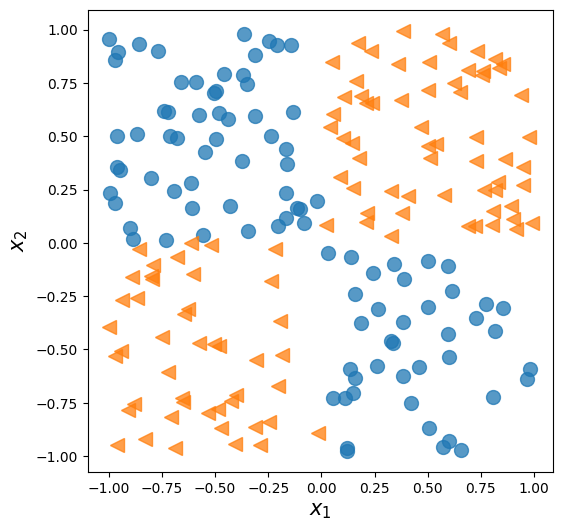

In [11]:
import matplotlib.pyplot as plt
import numpy as np

torch.manual_seed(1)
np.random.seed(1)
x = np.random.uniform(low=-1, high=1, size=(200, 2))
y = np.ones(len(x))
y[x[:, 0] * x[:, 1]<0] = 0
n_train = 100
x_train = torch.tensor(x[:n_train, :], dtype=torch.float32)
y_train = torch.tensor(y[:n_train], dtype=torch.float32)
x_valid = torch.tensor(x[n_train:, :], dtype=torch.float32)
y_valid = torch.tensor(y[n_train:], dtype=torch.float32)
fig = plt.figure(figsize=(6, 6))
plt.plot(x[y==0, 0], x[y==0, 1], 'o', alpha=0.75, markersize=10)
plt.plot(x[y==1, 0], x[y==1, 1], '<', alpha=0.75, markersize=10)
plt.xlabel(r'$x_1$', size=15)
plt.ylabel(r'$x_2$', size=15)
plt.show()

In [14]:
from torch.utils.data import DataLoader, TensorDataset

train_ds = TensorDataset(x_train, y_train)
batch_size = 2
torch.manual_seed(1)
train_dl = DataLoader(train_ds, batch_size, shuffle=True)

In [31]:
import torch.nn as nn

class MyModule(nn.Module):
    def __init__(self):
        super().__init__()
        l1 = nn.Linear(2, 4)
        a1 = nn.ReLU()
        l2 = nn.Linear(4, 4)
        a2 = nn.ReLU()
        l3 = nn.Linear(4, 1)
        a3 = nn.Sigmoid()
        l = [l1, a1, l2, a2, l3, a3]
        self.module_list = nn.ModuleList(l)
        
    def forward(self, x):
        for f in self.module_list:
            x = f(x)
        return x

    def predict(self, x):
        x = torch.tensor(x, dtype=torch.float32)
        pred = self.forward(x)[:, 0]
        return (pred>=0.5).float()

def train(model, num_epochs, train_dl, x_valid, y_valid):
    loss_hist_train = [0] * num_epochs
    accuracy_hist_train = [0] * num_epochs
    loss_hist_valid = [0] * num_epochs
    accuracy_hist_valid = [0] * num_epochs
    for epoch in range(num_epochs):
        for x_batch, y_batch in train_dl:
            pred = model(x_batch)[:, 0]
            loss = loss_fn(pred, y_batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            loss_hist_train[epoch] += loss.item()
            is_correct = ((pred>=0.5).float() == y_batch).float()
            accuracy_hist_train[epoch] += is_correct.mean()
        loss_hist_train[epoch] /= n_train/batch_size
        accuracy_hist_train[epoch] /= n_train/batch_size
        pred = model(x_valid)[:, 0]
        loss = loss_fn(pred, y_valid)
        loss_hist_valid[epoch] = loss.item()
        is_correct = ((pred>=0.5).float() == y_valid).float()
        accuracy_hist_valid[epoch] += is_correct.mean()
    return loss_hist_train, loss_hist_valid, \
           accuracy_hist_train, accuracy_hist_valid

In [32]:
model = MyModule()
model

MyModule(
  (module_list): ModuleList(
    (0): Linear(in_features=2, out_features=4, bias=True)
    (1): ReLU()
    (2): Linear(in_features=4, out_features=4, bias=True)
    (3): ReLU()
    (4): Linear(in_features=4, out_features=1, bias=True)
    (5): Sigmoid()
  )
)

In [33]:
torch.manual_seed(1)
num_epochs = 200

loss_fn = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.015)
history = train(model, num_epochs, train_dl, x_valid, y_valid)

In [ ]:
pip install mlxtend

/var/folders/lj/sq_z3m_s3z51_g2s4qfv2hrw0000gn/T/ipykernel_48709/3537676438.py:16: DeprecationWarning: Converting `np.integer` or `np.signedinteger` to a dtype is deprecated. The current result is `np.dtype(np.int_)` which is not strictly correct. Note that the result depends on the system. To ensure stable results use may want to use `np.int64` or `np.int32`.
  y=y_valid.numpy().astype(np.integer),


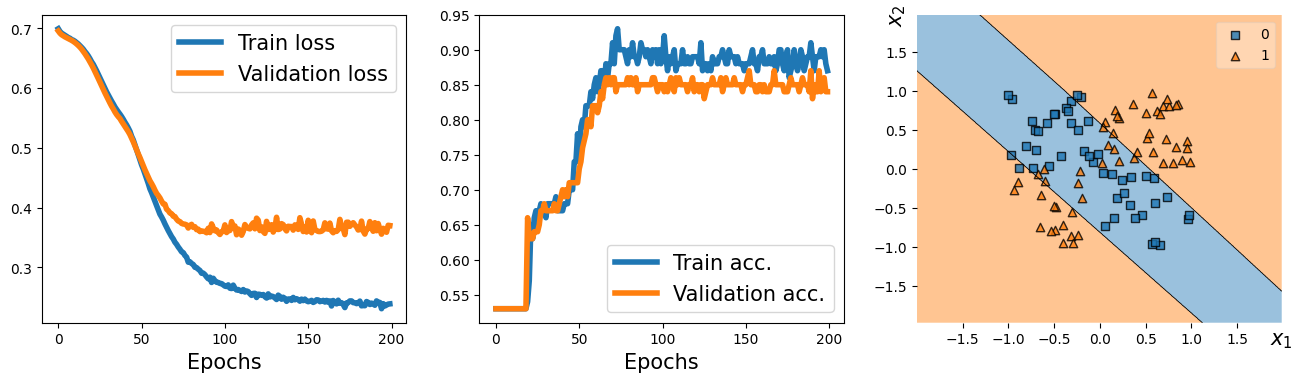

In [34]:
from mlxtend.plotting import plot_decision_regions

fig = plt.figure(figsize=(16, 4))
ax = fig.add_subplot(1, 3, 1)
plt.plot(history[0], lw=4)
plt.plot(history[1], lw=4)
plt.legend(['Train loss', 'Validation loss'], fontsize=15)
ax.set_xlabel('Epochs', size=15)
ax = fig.add_subplot(1, 3, 2)
plt.plot(history[2], lw=4)
plt.plot(history[3], lw=4)
plt.legend(['Train acc.', 'Validation acc.'], fontsize=15)
ax.set_xlabel('Epochs', size=15)
ax = fig.add_subplot(1, 3, 3)
plot_decision_regions(X=x_valid.numpy(),
                      y=y_valid.numpy().astype(np.integer),
                      clf=model)
ax.set_xlabel(r'$x_1$', size=15)
ax.xaxis.set_label_coords(1, -0.025)
ax.set_ylabel(r'$x_2$', size=15)
ax.yaxis.set_label_coords(-0.025, 1)
plt.show()

In [40]:
class NoisyLinear(nn.Module):
    def __init__(self, input_size, output_size,
                 noise_stddev=0.1):
        super().__init__()
        w = torch.Tensor(input_size, output_size)
        self.w = nn.Parameter(w)  # nn.Parameter is a Tensor
                                  # that's a module parameter.
        nn.init.xavier_uniform_(self.w)
        b = torch.Tensor(output_size).fill_(0)
        self.b = nn.Parameter(b)
        self.noise_stddev = noise_stddev
        
    def forward(self, x, training=False):
        if training:
            noise = torch.normal(0.0, self.noise_stddev, x.shape)
            x_new = torch.add(x, noise)
        else:
            x_new = x
        return torch.add(torch.mm(x_new, self.w), self.b)

class MyNoisyModule(nn.Module):
    def __init__(self):
        super().__init__()
        self.l1 = NoisyLinear(2, 4, 0.07)
        self.a1 = nn.ReLU()
        self.l2 = nn.Linear(4, 4)
        self.a2 = nn.ReLU()
        self.l3 = nn.Linear(4, 1)
        self.a3 = nn.Sigmoid()
        
    def forward(self, x, training=False):
        x = self.l1(x, training)
        x = self.a1(x)
        x = self.l2(x)
        x = self.a2(x)
        x = self.l3(x)
        x = self.a3(x)
        return x
        
    def predict(self, x):
        x = torch.tensor(x, dtype=torch.float32)
        pred = self.forward(x)[:, 0]
        return (pred>=0.5).float()

In [41]:
torch.manual_seed(1)
model = MyNoisyModule()
model

MyNoisyModule(
  (l1): NoisyLinear()
  (a1): ReLU()
  (l2): Linear(in_features=4, out_features=4, bias=True)
  (a2): ReLU()
  (l3): Linear(in_features=4, out_features=1, bias=True)
  (a3): Sigmoid()
)

In [42]:
loss_fn = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.015)

torch.manual_seed(1)
loss_hist_train = [0] * num_epochs
accuracy_hist_train = [0] * num_epochs
loss_hist_valid = [0] * num_epochs
accuracy_hist_valid = [0] * num_epochs

for epoch in range(num_epochs):
    for x_batch, y_batch in train_dl:
        pred = model(x_batch, True)[:, 0]
        loss = loss_fn(pred, y_batch)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        loss_hist_train[epoch] += loss.item()
        is_correct = (
            (pred>=0.5).float() == y_batch
        ).float()
        accuracy_hist_train[epoch] += is_correct.mean()
    loss_hist_train[epoch] /= n_train/batch_size
    accuracy_hist_train[epoch] /= n_train/batch_size
    pred = model(x_valid)[:, 0]
    loss = loss_fn(pred, y_valid)
    loss_hist_valid[epoch] = loss.item()
    is_correct = ((pred>=0.5).float() == y_valid).float()
    accuracy_hist_valid[epoch] += is_correct.mean()

/var/folders/lj/sq_z3m_s3z51_g2s4qfv2hrw0000gn/T/ipykernel_48709/3798424000.py:15: DeprecationWarning: Converting `np.integer` or `np.signedinteger` to a dtype is deprecated. The current result is `np.dtype(np.int_)` which is not strictly correct. Note that the result depends on the system. To ensure stable results use may want to use `np.int64` or `np.int32`.
  y=y_valid.numpy().astype(np.integer),


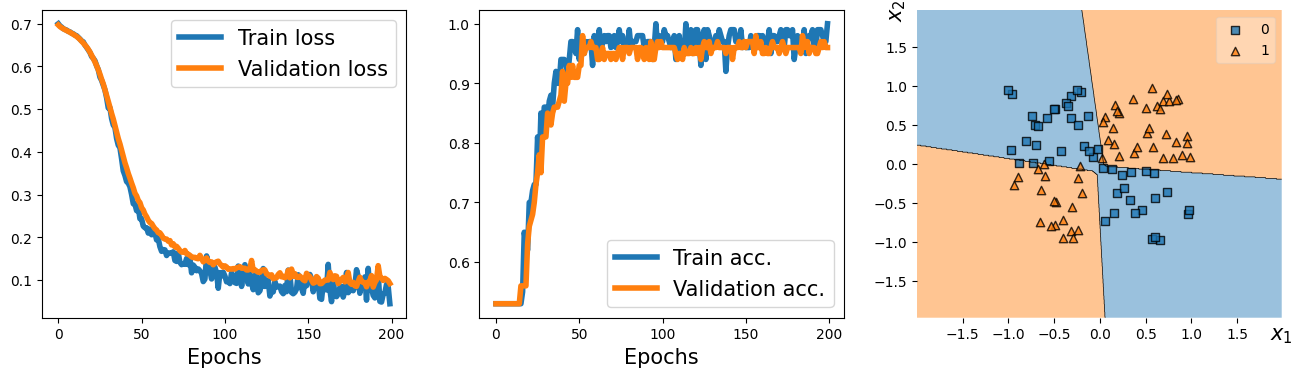

In [43]:
fig = plt.figure(figsize=(16, 4))
ax = fig.add_subplot(1, 3, 1)
plt.plot(loss_hist_train, lw=4)
plt.plot(loss_hist_valid, lw=4)
plt.legend(['Train loss', 'Validation loss'], fontsize=15)
ax.set_xlabel('Epochs', size=15)
ax = fig.add_subplot(1, 3, 2)
plt.plot(accuracy_hist_train, lw=4)
plt.plot(accuracy_hist_valid, lw=4)
plt.legend(['Train acc.', 'Validation acc.'], fontsize=15)
ax.set_xlabel('Epochs', size=15)
ax = fig.add_subplot(1, 3, 3)
plot_decision_regions(
    X=x_valid.numpy(),
    y=y_valid.numpy().astype(np.integer),
    clf=model
)
ax.set_xlabel(r'$x_1$', size=15)
ax.xaxis.set_label_coords(1, -0.025)
ax.set_ylabel(r'$x_2$', size=15)
ax.yaxis.set_label_coords(-0.025, 1)
plt.show()